<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Marketing_Analytics_Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exploratory Data Analysis

Customer churn

When an existing customer stops doing business with a company

Contractual churn
Voluntary churn
Non-contractual churn
Involuntary churn: Credit card expiration

Utilizing your experience
- Customer
  - Lack of usage
  - Poor Service
  - Better Price
- Domain/industry knowledge

Features of interest
- Voice mail
- International calling
- Cost for the service
- Customer usage
- Customer churn

How churn is defined here

Customer cancelling their cellular plan at a given point in time
- "no"
- "yes"

Exploratory data analysis using pandas
- Understand the features of the dataset
- Compute summary statistics

Defining customer churn

- Cancelled a service that is under contract.
- Expiration of credit card.
- Left a service not under contract.
- Purchase from a different store.

In [0]:
import pandas as pd

In [0]:
telco = pd.read_csv('https://assets.datacamp.com/production/repositories/1764/datasets/79c5446a4a753e728e32b4a67138344847b8f131/Churn.csv')

In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

Exploring customer churn

It looks like there are far more Non-Churners than Churners in our dataset.

In [4]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Differences between churners and non-churners
- Do churners call customer service more often?
- Does one state have more churners compared to another?

Summary statistics for both classes

Churners make more customer service calls than non-churners.

In [5]:
# Group telco by 'Churn' and compute the mean
print(telco.groupby(['Churn']).mean())
# Adapt your code to compute the standard deviation
print(telco.groupby(['Churn']).std())


       Account_Length  Vmail_Message  ...  Intl_Charge   Area_Code
Churn                                 ...                         
no         100.793684       8.604561  ...     2.743404  437.074737
yes        102.664596       5.115942  ...     2.889545  437.817805

[2 rows x 16 columns]
       Account_Length  Vmail_Message  ...  Intl_Charge  Area_Code
Churn                                 ...                        
no           39.88235      13.913125  ...     0.751784  42.306156
yes          39.46782      11.860138  ...     0.754152  42.792270

[2 rows x 16 columns]


Churn by State

When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. 

In [6]:
# Count the number of churners and non-churners by State
print(telco.groupby('State')['Churn'].value_counts())


State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64


Exploring feature distributions

Important to understand how your variables are distributed

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


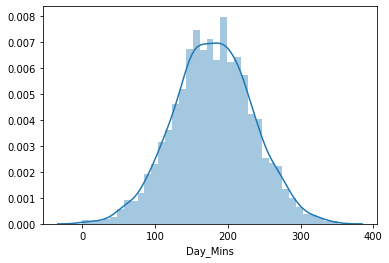

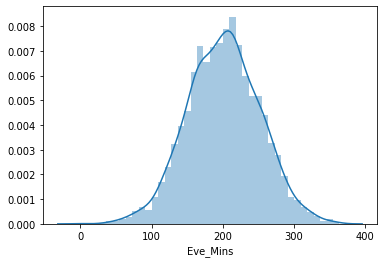

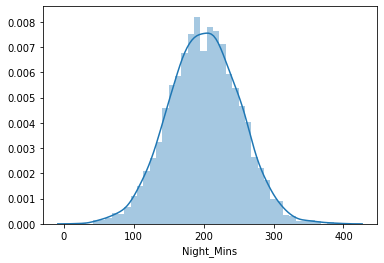

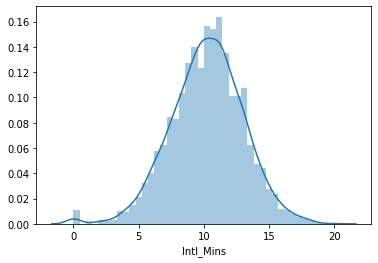

In [7]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Day_Mins'
sns.distplot(telco['Day_Mins'])

# Display the plot
plt.show()

# Visualize the distribution of 'Eve_Mins'
sns.distplot(telco['Eve_Mins'])

# Display the plot
plt.show()

# Visualize the distribution of 'Night_Mins'
sns.distplot(telco['Night_Mins'])

# Display the plot
plt.show()

# Visualize the distribution of 'Intl_Mins'
sns.distplot(telco['Intl_Mins'])

# Display the plot
plt.show()

Customer service calls and churn

there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners. 

There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

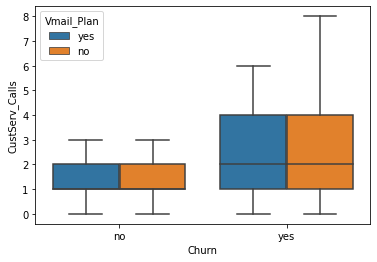

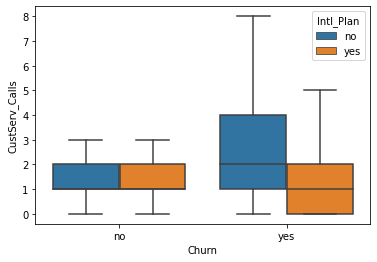

In [8]:
# Add "Vmail_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Vmail_Plan")

# Display the plot
plt.show()

# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

#  Preprocessing for Churn Modeling

Model assumptions
- Some assumptions that models make:
  - That the features are normally distributed
  - That the features are on the same scale

Data types
- Machine learning algorithms require numeric data types
  - Need to encode categorical variables as numeric

Feature scaling
- Features should be on the same scale
- Rarely true of real-world data

Standardization
- Centers the distribution around the mean
- Calculates the number of standard deviations away from the mean each point is

Dropping unnecessary features
- Unique identifiers
- Phone numbers
- Social security numbers
- Account numbers

Dropping correlated features
- Highly correlated features can be dropped
- They provide no additional information to the model

Feature engineering
- Creating new features to help improve model performance
- Should consult with business and subject matter experts

Identifying features to convert

Churn, Vmail_Plan, and Intl_Plan, in particular, are binary features that can easily be converted into 0s and 1s.

In [9]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

Encoding binary features

With these features encoded as 0 and 1, you can now use them in machine learning algorithms.

In [10]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0 , 'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0 , 'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco["Intl_Plan"])
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

One hot encoding

Notice that this creates an entirely new DataFrame. Once you merge this back into the original telco DataFrame, you can begin using these state features in your models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary.

In [12]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])

# Print the head of telco_state
print(telco_state.head())

   AK  AL  AR  AZ  CA  CO  CT  DC  DE  ...  TN  TX  UT  VA  VT  WA  WI  WV  WY
0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0

[5 rows x 51 columns]


Feature scaling

Both features are now on the same scale. In practice, you'll need to carefully ensure this is the case for all features of interest.

In [13]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco[["Intl_Calls", "Night_Mins"]])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


Dropping unnecessary features

Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling.

Why don't we use unique identifiers such as phone numbers in our churn model? They don't provide any predictive power.

In [14]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


Engineering a new column

Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering:

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

In [15]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


# Churn Prediction

(Supervised) Machine Learning Primer
- Goal: Predict whether or not a customer will churn
- Target Variable: 'Churn'
- Supervised Machine Learning
- Learn from historical (training) data to make new - predictions

Model Selection
- Which model to use?
- ... it depends!
- Logistic regression: Good baseline
  - Offers simplicity and interpretability
  - Cannot capture more complex relationships
- Random forests
- Support vector machines

Accuracy
- One possible metric: Accuracy
  - Total Number of Correct Predictions / Total Number of Data Points
- What data to use?
  - Training data not representative of new data

Training and Test Sets
- Fit your classi?er to the training set
- Make predictions using the test set

Improving your model
- Overfitting: Model fits the training data too closely
- Underfitting: Does not capture trends in the training data
- Need to find the right balance between overfitting and underfitting

Probability thresholds
- Every prediction your classifier makes has an associated probability
- Default probability threshold in scikit-learn: 50%
- What if we vary this threshold?

Predicting whether a new customer will churn

In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']
# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(telco[features].iloc[:1, :]))

[0]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(telco[features].iloc[:1, :]))

[0]


Creating training and test sets

In [0]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.3)

Computing accuracy

In [29]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.938


Imbalanced classes

Precision

- A model with high precision indicates:
  - Few false positives ("false alarms")
  - Not many non-churners were classi?ed as churners

Recall

-  A model with high recall indicates that it correctly classified most churners

Confusion matrix

There are 8 false positives in your classifier's predictions.



In [35]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[822   8]
 [ 54 116]]


Computing precision and recall

In [36]:
# Import precision_score
from sklearn.metrics import precision_score
# Import recall_score
from sklearn.metrics import recall_score

# Print the precision
print(precision_score(y_test, y_pred))
# Print the recall
print(recall_score(y_test, y_pred))

0.9354838709677419
0.6823529411764706


ROC curve

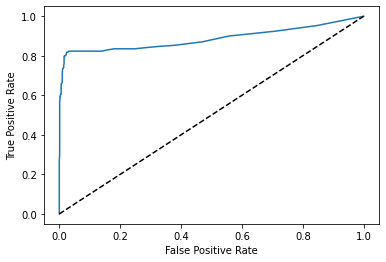

In [37]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

Area under the curve

This indicates that this baseline random forest classifier is quite good!

In [38]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8859107016300496
